In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [177]:
cust=pd.read_csv("C:/Users/91954/PY/py1/assignments/4. Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")
cust.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [178]:
rp=pd.read_csv("C:/Users/91954/PY/py1/assignments/4. Pandas Case Study 2 - Credit Card Case Study/Repayment.csv")
rp.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [179]:
rp.drop("Unnamed: 4",axis=1,inplace=True)
rp.head()

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88


In [180]:
sp=pd.read_csv("C:/Users/91954/PY/py1/assignments/4. Pandas Case Study 2 - Credit Card Case Study/spend.csv")
sp.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


# Exploratory data analysis

In [181]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [182]:
rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SL No:    1499 non-null   float64
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(2), object(2)
memory usage: 47.7+ KB


In [183]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [184]:
rp.shape,sp.shape,cust.shape

((1523, 4), (1500, 5), (100, 8))

In [185]:
rp.isnull().sum()

SL No:      24
Customer    23
Month       23
Amount      23
dtype: int64

In [186]:
rp.dropna(inplace=True)

In [187]:
rp.isnull().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

In [188]:
sp.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [190]:
cust.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

### 1. In case age is less than 18, replace it with mean of age values.

In [191]:
cust.head(10)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
5,6,A6,70,DELHI,Silver,100000.0,C6,Self Employed
6,7,A7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
7,8,A8,67,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9,A9,79,CHENNAI,Silver,100003.0,C9,Govt
9,10,A10,54,CALCUTTA,Gold,500000.0,C10,Normal Salary


In [192]:
cust["Age"].mean()

46.49

In [193]:
cust.loc[cust["Age"]<18,"Age"]=cust["Age"].mean()
cust["Age"].mean()

48.399399999999986

### 2. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [194]:
cust.head()
sp.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [198]:
cs=pd.merge(cust,sp,on="Customer",how="inner")
cs.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [199]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Age       1500 non-null   float64
 3   City      1500 non-null   object 
 4   Product   1500 non-null   object 
 5   Limit     1500 non-null   float64
 6   Company   1500 non-null   object 
 7   Segment   1500 non-null   object 
 8   Sl No:    1500 non-null   int64  
 9   Month     1500 non-null   object 
 10  Type      1500 non-null   object 
 11  Amount    1500 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 152.3+ KB


In [201]:
cs.loc[cs["Amount"] > cs["Limit"],"Amount"] = (50 * cs["Limit"])/(100)
cs.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


### 3.Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [202]:
cr=pd.merge(cust,rp,on="Customer",how="inner")

In [203]:
cr.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,23-Feb-05,365366.62


In [204]:
cr.loc[cr["Amount"]>cr["Limit"]]

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
17,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104.0,3-Jan-04,185955.07
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118.0,28-Feb-05,412783.34
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132.0,6-Apr-04,148038.67
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146.0,23-Nov-04,179144.68
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,174.0,3-Aug-05,381635.66
...,...,...,...,...,...,...,...,...,...,...,...
1485,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89.0,30-Mar-06,462283.02
1494,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,25-Jan-04,310992.30
1495,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,12-Jan-04,121874.90
1496,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,3-Jan-04,337815.57


In [209]:
cr.loc[cr["Amount"]>cr["Limit"],"Amount"]=cr["Limit"]
cr.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,23-Feb-05,365366.62


In [208]:
len(cr.loc[cr["Amount"]>cr["Limit"]])

0

### 3. How many distinct customers exist?

In [210]:
cust["Customer"].nunique()

100

### 4.How many distinct categories exist?

In [211]:
cust["Segment"].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

In [212]:
len(cust["Segment"].value_counts())

5

### 5. What is the average monthly spend by customers?

In [213]:
sp.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [214]:
sp["Month"]=pd.to_datetime(sp["Month"])

In [215]:
sp["Month"].dtype

dtype('<M8[ns]')

In [216]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [217]:
sp["mnthly"]=sp["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [218]:
sp["yearly"]=sp["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [219]:
sp.head()

,Sl No:,Customer,Month,Type,Amount,mnthly,yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


In [220]:
rp.head()

,SL No:,Customer,Month,Amount
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
5,6.0,A1,23-Feb-05,365366.62


In [223]:
rp["Month"]=pd.to_datetime(rp["Month"])
rp.head()

,SL No:,Customer,Month,Amount
1,2.0,A1,2004-01-03,245899.02
2,3.0,A1,2004-01-15,259490.06
3,4.0,A1,2004-01-25,437555.12
4,5.0,A1,2005-01-17,165972.88
5,6.0,A1,2005-02-23,365366.62


In [221]:
rp.info()
rp.isnull().sum()
# rp.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 1 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SL No:    1499 non-null   float64
 1   Customer  1499 non-null   object 
 2   Month     1499 non-null   object 
 3   Amount    1499 non-null   float64
dtypes: float64(2), object(2)
memory usage: 58.6+ KB


SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

In [224]:
rp["Monthly"]=rp["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
rp["Yearly"]=rp["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [225]:
rp.head()

,SL No:,Customer,Month,Amount,Monthly,Yearly
1,2.0,A1,2004-01-03,245899.02,January,2004
2,3.0,A1,2004-01-15,259490.06,January,2004
3,4.0,A1,2004-01-25,437555.12,January,2004
4,5.0,A1,2005-01-17,165972.88,January,2005
5,6.0,A1,2005-02-23,365366.62,February,2005


In [226]:
sr=pd.merge(sp,rp,on="Customer")

In [227]:
sr.head()

,Sl No:,Customer,Month_x,Type,Amount_x,mnthly,yearly,SL No:,Month_y,Amount_y,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.8,January,2004,2.0,2004-01-03,245899.02,January,2004
1,1,A1,2004-01-12,JEWELLERY,485470.8,January,2004,3.0,2004-01-15,259490.06,January,2004
2,1,A1,2004-01-12,JEWELLERY,485470.8,January,2004,4.0,2004-01-25,437555.12,January,2004
3,1,A1,2004-01-12,JEWELLERY,485470.8,January,2004,5.0,2005-01-17,165972.88,January,2005
4,1,A1,2004-01-12,JEWELLERY,485470.8,January,2004,6.0,2005-02-23,365366.62,February,2005


###  6.What is the average monthly repayment by customers?

In [230]:
msr=sr.groupby(["mnthly","yearly"])["Amount_x","Amount_y"].sum().round(2)
msr.head()

<ipython-input-230-8c698a454d96>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  msr=sr.groupby(["mnthly","yearly"])["Amount_x","Amount_y"].sum().round(2)


Amount_x      Amount_y
mnthly yearly                            
April  2004    1.664730e+08  1.795128e+08
       2005    1.985560e+08  1.944499e+08
       2006    5.434594e+08  5.739046e+08
August 2005    1.676677e+08  1.726563e+08
       2006    9.520109e+07  1.017625e+08

In [231]:
msr.rename(columns={"Amount_x":"mos","Amount_y":"mor"},inplace=True)
msr

mos           mor
mnthly    yearly                            
April     2004    1.664730e+08  1.795128e+08
          2005    1.985560e+08  1.944499e+08
          2006    5.434594e+08  5.739046e+08
August    2005    1.676677e+08  1.726563e+08
          2006    9.520109e+07  1.017625e+08
December  2005    5.088172e+07  8.954003e+07
          2006    7.984531e+07  7.571813e+07
February  2004    1.468799e+08  1.731605e+08
          2005    9.626569e+08  1.038646e+09
          2006    2.529986e+08  2.372385e+08
January   2004    1.895007e+09  1.870945e+09
          2005    2.223752e+08  1.791656e+08
          2006    9.837846e+07  8.570876e+07
July      2005    9.057456e+07  9.981389e+07
          2006    2.165067e+08  1.858434e+08
June      2005    3.216256e+08  3.144390e+08
          2006    6.642966e+07  9.192668e+07
March     2004    8.938031e+07  9.071044e+07
          2006    1.274427e+09  1.282546e+09
May       2004    7.809510e+07  9.137620e+07
          2005    8.853393e+08  8.895885e+08
          2006    3.090216e+08  3.287737e+08
November  2004    9.321587e+07  8.943304e+07
          2005    3.055961e+08  2.577112e+08
          2006    1.141199e+08  1.590248e+08
October   2005    6.218014e+07  8.525009e+07
          2006    9.134721e+07  9.562227e+07
September 2004    1.113694e+08  9.273326e+07
          2005    6.404540e+07  7.888690e+07
          2006    6.765554e+07  9.996138e+07

###  7. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [232]:
msr["mpr"]=msr["mor"]-msr["mos"]
msr.head(10)

mos           mor          mpr
mnthly   yearly                                         
April    2004    1.664730e+08  1.795128e+08  13039815.22
         2005    1.985560e+08  1.944499e+08  -4106119.39
         2006    5.434594e+08  5.739046e+08  30445222.87
August   2005    1.676677e+08  1.726563e+08   4988617.00
         2006    9.520109e+07  1.017625e+08   6561439.98
December 2005    5.088172e+07  8.954003e+07  38658310.50
         2006    7.984531e+07  7.571813e+07  -4127179.51
February 2004    1.468799e+08  1.731605e+08  26280611.72
         2005    9.626569e+08  1.038646e+09  75989253.09
         2006    2.529986e+08  2.372385e+08 -15760107.26

In [233]:
msr["profit"]=2.9*msr["mpr"]
msr.head()

mos           mor          mpr        profit
mnthly yearly                                                       
April  2004    1.664730e+08  1.795128e+08  13039815.22  3.781546e+07
       2005    1.985560e+08  1.944499e+08  -4106119.39 -1.190775e+07
       2006    5.434594e+08  5.739046e+08  30445222.87  8.829115e+07
August 2005    1.676677e+08  1.726563e+08   4988617.00  1.446699e+07
       2006    9.520109e+07  1.017625e+08   6561439.98  1.902818e+07

In [234]:
msr.loc[msr["profit"]>0]

mos           mor          mpr        profit
mnthly    yearly                                                       
April     2004    1.664730e+08  1.795128e+08  13039815.22  3.781546e+07
          2006    5.434594e+08  5.739046e+08  30445222.87  8.829115e+07
August    2005    1.676677e+08  1.726563e+08   4988617.00  1.446699e+07
          2006    9.520109e+07  1.017625e+08   6561439.98  1.902818e+07
December  2005    5.088172e+07  8.954003e+07  38658310.50  1.121091e+08
February  2004    1.468799e+08  1.731605e+08  26280611.72  7.621377e+07
          2005    9.626569e+08  1.038646e+09  75989253.09  2.203688e+08
July      2005    9.057456e+07  9.981389e+07   9239324.06  2.679404e+07
June      2006    6.642966e+07  9.192668e+07  25497024.41  7.394137e+07
March     2004    8.938031e+07  9.071044e+07   1330130.32  3.857378e+06
          2006    1.274427e+09  1.282546e+09   8118766.68  2.354442e+07
May       2004    7.809510e+07  9.137620e+07  13281104.27  3.851520e+07
          2005    8.853393e+08  8.895885e+08   4249143.97  1.232252e+07
          2006    3.090216e+08  3.287737e+08  19752063.16  5.728098e+07
November  2006    1.141199e+08  1.590248e+08  44904869.22  1.302241e+08
October   2005    6.218014e+07  8.525009e+07  23069950.14  6.690286e+07
          2006    9.134721e+07  9.562227e+07   4275057.43  1.239767e+07
September 2005    6.404540e+07  7.888690e+07  14841497.81  4.304034e+07
          2006    6.765554e+07  9.996138e+07  32305840.26  9.368694e+07

###  What are the top 5 product types?


In [235]:
cust.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [236]:
sp.head()

,Sl No:,Customer,Month,Type,Amount,mnthly,yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


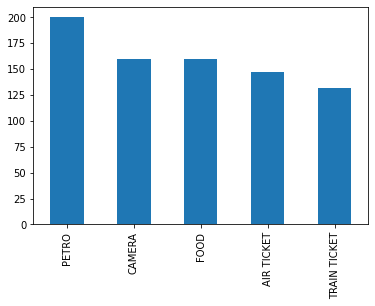

In [244]:
sp["Type"].value_counts().head().plot(kind="bar")
plt.show()

###  Which city is having maximum spend?

In [245]:
cs.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [257]:
msc=cs.groupby(["City"])["Amount"].sum()
msc.sort_values(ascending=False,inplace=True)
msc

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

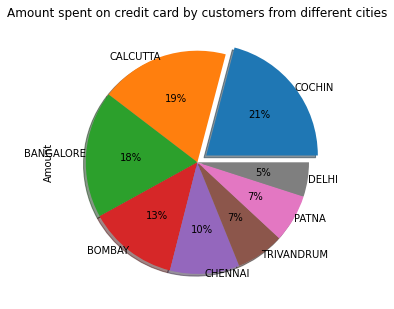

In [267]:
plt.figure(figsize=(5,10))
msc.plot(kind="pie",autopct="%1.0f%%",shadow=True,labeldistance=1.0,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Amount spent on credit card by customers from different cities")
plt.show()

### Which age group is spending more money?

In [273]:
cs["Age"].min(),cs["Age"].max()

(19.0, 79.0)

In [290]:
cs["agegrup"]=pd.cut(cs["Age"],bins=np.arange(18,88,8))
cs

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,agegrup
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,"(74, 82]"
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,"(74, 82]"
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,"(74, 82]"
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,"(74, 82]"
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,"(74, 82]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,"(50, 58]"
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,"(50, 58]"
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,"(50, 58]"
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,"(34, 42]"


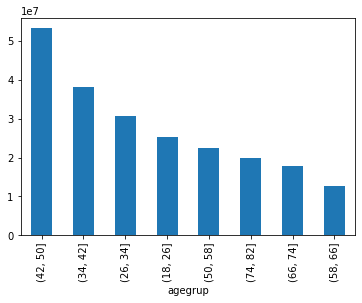

In [294]:
cs.groupby(["agegrup"])["Amount"].sum().sort_values(ascending=False).plot(kind="bar")
plt.show()

### Who are the top 10 customers in terms of repayment?

In [295]:
cr.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,23-Feb-05,365366.62


In [298]:
cr.groupby(["Customer"])["Amount"].sum().sort_values(ascending=False).head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64

### Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

In [301]:
cs1=pd.merge(cust,sp,on="Customer")
cs1.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,mnthly,yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,January,2005


In [320]:
css=cs1.groupby(["City","Product","yearly"])["Amount"].sum()
css

City        Product   yearly
BANGALORE   Gold      2004       9289878.54
                      2005      12892362.99
                      2006      12030611.09
            Platimum  2004       6046763.93
                      2005       7784194.68
                                   ...     
TRIVANDRUM  Platimum  2005       7186762.35
                      2006       4174473.45
            Silver    2004        795897.19
                      2005       1445540.63
                      2006       2005942.36
Name: Amount, Length: 72, dtype: float64

In [310]:
cs2 = pd.pivot_table(data = cs1,index=["City","yearly"],columns='Product',aggfunc="sum",values="Amount")
cs2

Product                   Gold     Platimum      Silver
City       yearly                                      
BANGALORE  2004     9289878.54   6046763.93  6773901.65
           2005    12892362.99   7784194.68  3936068.22
           2006    12030611.09   5620904.86  4967945.66
BOMBAY     2004     6987853.53   5199581.00  3061805.08
           2005     8983018.28   5134074.48  2368375.97
           2006     7917144.31   7547549.72  3628864.37
CALCUTTA   2004     7477140.98   5961165.93  3321963.10
           2005    10303355.80   8810284.03  1285609.11
           2006    11167532.77  11305526.03  4783182.26
CHENNAI    2004     1059618.50   5558572.68  1156129.37
           2005     3740945.58   8868435.43  1000540.48
           2006     2704288.62   6921130.79  1665326.62
COCHIN     2004     7315850.15   8472832.23  4587738.70
           2005    12110613.03  10856722.82  2619231.25
           2006    10499142.38  12453968.83  4579249.87
DELHI      2004     2806495.00   1565199.90  4293224.28
           2005     1964845.27   2068490.16  2515127.59
           2006     2957103.32    764247.73  4581831.29
PATNA      2004     2072567.90   1113069.60  3398795.65
           2005     3252615.77   2883231.07  5244763.90
           2006     2276181.69   1256137.65  3111911.31
TRIVANDRUM 2004     2415102.84   3761433.87   795897.19
           2005     1240375.85   7186762.35  1445540.63
           2006     2735710.87   4174473.45  2005942.36

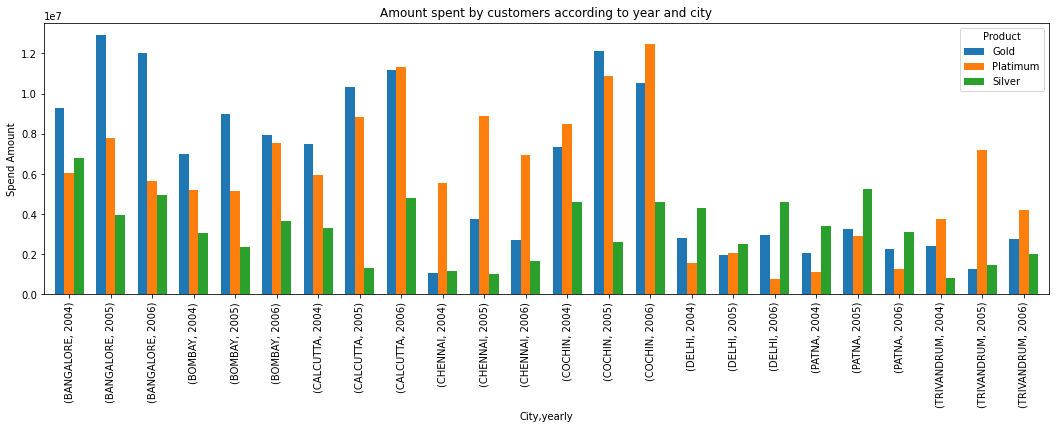

In [322]:
cs2.plot(kind="bar",figsize=(18,5),width=0.7)
plt.ylabel("Spend Amount")
plt.title("Amount spent by customers according to year and city")
plt.show()

### Create graphs for Monthly comparison of total spends, city wise

In [324]:
cs3 = pd.pivot_table(data = cs1,index=["mnthly"],columns='City',aggfunc="sum",values="Amount")
cs3

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
mnthly,,,,,,,,
April,6182081.72,3726382.34,6883832.96,3231144.38,7070107.83,2845176.75,2786278.83,2775772.32
August,1552898.45,1066744.75,2179294.85,681577.16,2582997.08,475893.81,813559.15,561400.55
December,722473.97,604939.17,456826.68,223628.27,2011774.32,967169.49,223902.41,640922.26
February,9875860.87,7813534.61,11449586.70,5866408.35,9459367.08,3072043.85,3466726.76,4459329.30
January,17782487.66,10681854.60,14163384.38,7649568.68,18692606.60,7373794.37,7388720.78,5688758.54
July,3737413.09,612457.59,2323261.43,1186667.37,1758023.02,488399.04,191003.23,960551.29
June,1382739.41,1486412.18,2693423.54,1903803.90,2738031.53,828262.78,1653183.92,828576.89
March,10765773.46,9857699.82,10076115.86,4413870.52,10733411.24,3386628.30,3795753.30,3855833.54
May,10743668.90,6974931.87,7868030.30,4422623.36,9912248.75,2638193.66,3476601.00,4631877.09


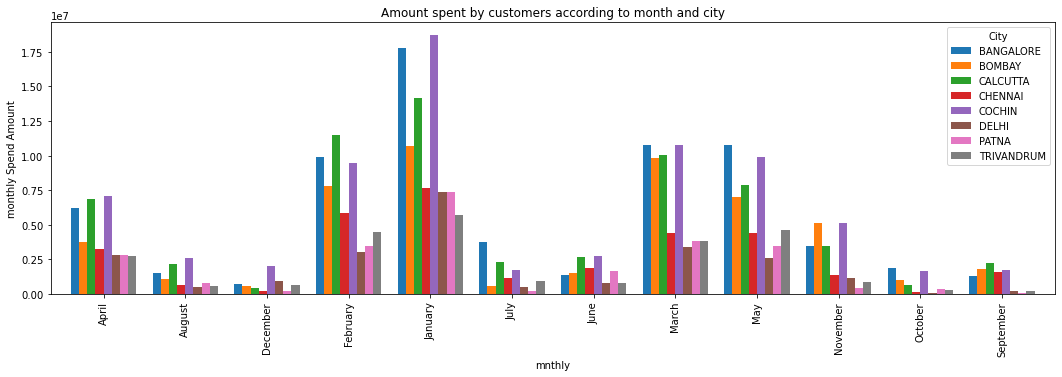

In [326]:
cs3.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("monthly Spend Amount")
plt.title("Amount spent by customers according to month and city")
plt.show()

### Comparison of yearly spend on air tickets

In [327]:
cs1.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,mnthly,yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,January,2005


In [352]:
syt=cs1.groupby(["yearly","Type"])["Amount"].sum().reset_index()
syt=pd.DataFrame(sya)
syt.head()

,yearly,Type,Amount
0,2004,AIR TICKET,8370914.59
1,2004,AUTO,837121.32
2,2004,BIKE,880622.23
3,2004,BUS TICKET,9352736.78
4,2004,CAMERA,15808342.75


###  Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


In [353]:
sya=syt.loc[sya["Type"]=="AIR TICKET"]
sya

,yearly,Type,Amount
0,2004,AIR TICKET,8370914.59
15,2005,AIR TICKET,14495718.73
30,2006,AIR TICKET,10088812.10


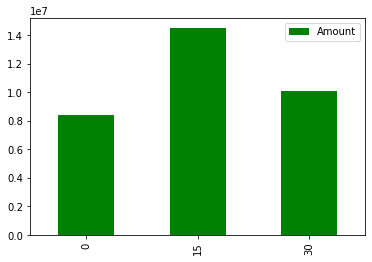

In [356]:
sya.plot(kind="bar",color="green")

In [349]:
smp=pd.pivot_table(data=cs1,index="mnthly",columns="Product",values="Amount",aggfunc="sum")
smp

Product,Gold,Platimum,Silver
mnthly,,,
April,13170572.59,12798498.34,9531706.20
August,4954030.42,3892605.15,1067730.23
December,2332940.96,2951972.85,566722.76
February,24779179.55,22081411.74,8602266.23
January,32413831.83,35212526.96,21794816.82
July,5167416.37,3695098.37,2395261.32
June,6538862.64,4756418.62,2219152.89
March,19256972.48,22639437.70,14988675.86
May,21548169.76,19380600.97,9739404.20


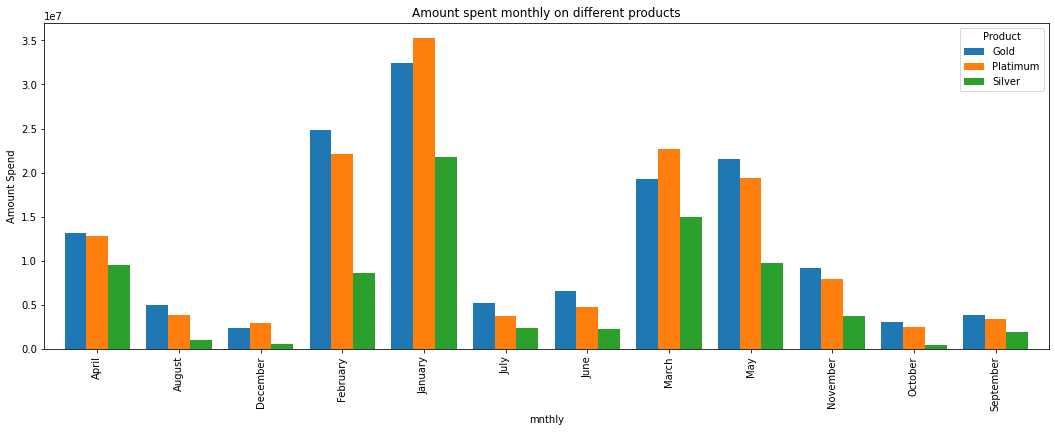

In [350]:
smp.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

#### Find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [363]:
csr=pd.merge(cs1,rp,on="Customer")
csr.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,mnthly,yearly,SL No:,Month_y,Amount_y,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,January,2004,2.0,2004-01-03,245899.02,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,January,2004,3.0,2004-01-15,259490.06,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,January,2004,4.0,2004-01-25,437555.12,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,January,2004,5.0,2005-01-17,165972.88,January,2005
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,January,2004,6.0,2005-02-23,365366.62,February,2005


In [373]:
csr1=pd.pivot_table(csr,index=["Product","City","Customer"],columns="Monthly",values="Amount_y",aggfunc="sum")
csr1.reset_index()

Monthly,Product,City,Customer,April,August,December,February,January,July,June,March,May,November,October,September
0,Gold,BANGALORE,A1,9161084.88,NaN,NaN,14073728.40,34423047.72,5349181.32,NaN,NaN,NaN,10286247.24,NaN,3355695.00
1,Gold,BANGALORE,A13,15326164.40,27072439.81,NaN,63544052.65,62439796.38,13162710.05,25950159.21,36690640.55,19610623.25,19300365.95,NaN,13635068.21
2,Gold,BANGALORE,A14,25190048.20,6157317.03,12053480.76,45970623.54,30786560.97,1300827.89,1274998.38,52169481.81,43966885.53,13039778.62,NaN,14331324.80
3,Gold,BANGALORE,A30,11493742.32,NaN,NaN,35679684.60,16417795.23,NaN,1960449.48,16181947.26,83336826.78,NaN,NaN,533567.25
4,Gold,BANGALORE,A43,18988795.80,NaN,NaN,23679254.83,61319182.65,24922001.43,729303.21,42742016.32,63828503.69,14085288.96,12891668.37,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Silver,PATNA,A8,2302676.82,NaN,NaN,15082545.78,35401692.60,NaN,NaN,10064287.80,23992128.00,8165688.12,NaN,NaN
96,Silver,PATNA,A84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464121.13,NaN,NaN,NaN,NaN
97,Silver,TRIVANDRUM,A57,6986221.34,NaN,3692424.09,9753198.37,28714521.78,NaN,NaN,27014041.73,9657151.09,3984435.47,NaN,NaN
98,Silver,TRIVANDRUM,A68,NaN,NaN,NaN,NaN,210196.52,NaN,NaN,NaN,639672.98,NaN,NaN,NaN


In [372]:
csr2=pd.pivot_table(csr,index=["Product","City","Customer"],columns="Yearly",values="Amount_y",aggfunc="sum")
csr2.reset_index()

Yearly,Product,City,Customer,2004,2005,2006
0,Gold,BANGALORE,A1,33558895.62,2.752486e+07,1.556523e+07
1,Gold,BANGALORE,A13,72447395.87,1.164879e+08,1.077968e+08
2,Gold,BANGALORE,A14,85878100.30,7.725143e+07,8.311180e+07
3,Gold,BANGALORE,A30,26426983.59,7.202915e+07,6.714788e+07
4,Gold,BANGALORE,A43,59101421.57,1.242157e+08,7.986894e+07
...,...,...,...,...,...,...
95,Silver,PATNA,A8,46328942.70,2.091167e+07,2.776841e+07
96,Silver,PATNA,A84,NaN,NaN,4.641211e+05
97,Silver,TRIVANDRUM,A57,51916138.84,9.657151e+06,2.822870e+07
98,Silver,TRIVANDRUM,A68,210196.52,NaN,6.396730e+05


In [400]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = csr.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount_y')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = csr.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount_y')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = csr.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount_y')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = csr.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount_y')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platimum' and timeperiod.lower()=='monthly':
        pivot = csr.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount_y')
        result = pivot.loc['Platimum',:]
    elif product.lower()=='platimum' and timeperiod.lower()=='yearly':
        pivot = csr.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount_y')
        result = pivot.loc['Platimum',:]
    return result

In [401]:
summary_report("platimum","yearly")

Give the product name and timeperiod for which you want the data


Yearly                                2004          2005          2006
Product  City       Customer                                          
Platimum BANGALORE  A19       1.583057e+07  3.026480e+07  3.387203e+07
                    A37       5.277915e+07  8.788985e+07  9.294095e+07
                    A5        1.914856e+07  1.981545e+07  1.272426e+07
                    A52       1.212587e+07  2.996347e+07  3.882224e+07
         BOMBAY     A33       6.345758e+06  1.904029e+07  4.186538e+07
                    A36       6.180095e+07  6.948974e+07  1.035270e+08
                    A4        6.297097e+06  1.019117e+07  1.107616e+07
                    A51       2.284271e+07  1.572757e+07  2.868812e+07
                    A70                NaN  1.563312e+06           NaN
                    A71       1.125727e+05  6.199548e+04           NaN
         CALCUTTA   A20       3.565862e+07  2.559453e+07  3.548592e+07
                    A34       1.138823e+06  1.122290e+07  1.844348e+07
                    A40       7.988442e+07  7.835934e+07  5.846947e+07
                    A49       6.573517e+07  8.252852e+07  6.585689e+07
                    A69                NaN  2.810662e+05  4.952569e+05
                    A98       3.378156e+05           NaN           NaN
                    A99       2.568273e+04           NaN           NaN
         CHENNAI    A38       6.049064e+07  7.466743e+07  9.644158e+07
                    A47       4.082190e+07  1.179872e+08  6.708412e+07
                    A56       6.942201e+05  1.836667e+07  6.262151e+07
         COCHIN     A21       1.039389e+08  1.210273e+08  7.389289e+07
                    A3        7.100657e+06  1.520714e+07  6.628062e+06
                    A35       4.453652e+05  1.767671e+07  2.677814e+07
                    A41       5.434155e+07  7.707181e+07  3.848520e+07
                    A50       1.300838e+07  1.611604e+07  4.629502e+07
                    A54       8.821458e+06  3.293664e+07  5.860238e+07
                    A83                NaN           NaN  1.328441e+05
         DELHI      A53       2.278233e+07  4.101375e+07  2.271393e+07
         PATNA      A55       6.031461e+06  1.274463e+07  5.173893e+07
         TRIVANDRUM A39       4.161760e+07  1.146869e+08  7.999244e+07
                    A48       5.939131e+07  9.571768e+07  1.019559e+08
                    A97       1.218749e+05           NaN           NaN